<a href="https://colab.research.google.com/github/Candida18/ADS_SMA/blob/main/ADS/8960_Candida_Noronha_ADS_Practical_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <b>Name: Candida Noronha<br/>
### <b>Class: BE COMPS B<br/>
### <b>Roll No: 8960

### **Experiment 6 - Use SMOTE technique to generate synthetic data.(to solve the problem of class imbalance)**

SMOTE (Synthetic Minority Oversampling Technique) is an oversampling method of balancing class distribution in the dataset. It selects the minority examples that are close to the feature space. Then, it draws the line between the examples in the features space and draws a new sample at a point along that line. 

In simple words, the algorithm selects the random example from the minority class and selects a random neighbor using K Nearest Neighbors. 

In [ ]:
%pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Unbalanced Dataset**

We will create an imbalanced classification dataset using make_classification from sci-kit learn’s dataset module. 

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# create a binary classification dataset
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.98],
    random_state=125,
)

labels = Counter(y)
print("y labels after oversampling")
print(labels)

y labels after oversampling
Counter({0: 970, 1: 30})


As we can observe, there are 1K samples. 970 belongs to 0 labels, and only 30 belongs to 1

We will then visualize the dataset using matplotlib’s pyplot.

As we can see, there are only a few yellow dots (1s) on the graph compared to purple. It is a clear example of an imbalanced dataset. 

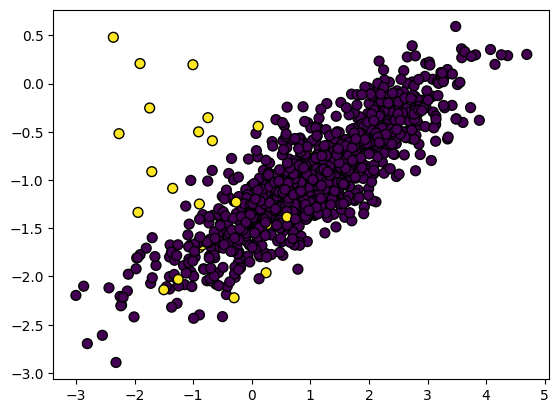

In [ ]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=50, edgecolor="k");


### **Model Training and Evaluation**

Before we balanced the dataset using oversampling, we need to set a baseline for the model performance. 

We will use the Decision Tree classification model on the dataset using 10-fold, 3-times cross-validation for training and evaluation. In short, we will be training and evaluating 30 models on the dataset. 

The stratification in RepeatedStratifiedKFold means that each cross-validation is split so that they have the same class distribution as the original dataset.

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
result = cross_val_score(model, X, y, scoring="roc_auc", cv=cv, n_jobs=-1)
# print("Mean AUC: %.3f" % np.mean(result))
print(np.mean(result))

0.6261741122565864


We got the ROC AUC mean score of 0.626 which is quite low. 



### **Oversampling using SMOTE()**


We will now apply an oversampling method SMOTE to balance our dataset. We will be using imbalanced-learn’s SMOTE function and provide it with features(X) and labels(y). 

In [ ]:
over = SMOTE()

X, y = over.fit_resample(X, y)

labels = Counter(y)
print("y labels after oversampling")
print(labels)

y labels after oversampling
Counter({0: 970, 1: 970})


Both 0, 1 labels are now balanced with 970 samples in each.  



Let’s visualize the synthetically balanced dataset. We can clearly see that we have equal amounts of yellow and purple dots. 

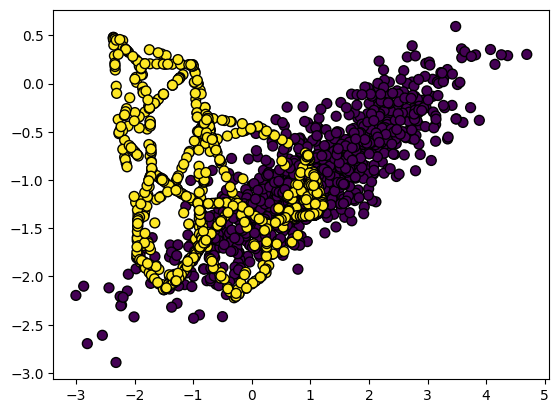

In [ ]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=50, edgecolor="k");

### **Model Training and Evaluation**

We will now train the model on a synthetic dataset and evaluate the results. We are keeping everything the same, so that we compare it with our baseline result. 

In [ ]:
model = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
result = cross_val_score(model, X, y, scoring="roc_auc", cv=cv, n_jobs=-1)

print("Mean AUC: %.3f" % np.mean(result))

Mean AUC: 0.853


After training for a few seconds we got an improved result or ROC AUC mean score of 0.834. It clearly shows that oversampling does improve the model performance. 

### **Conclusion** - 
We should combine oversampling (SMOTE) with the undersampling of the majority class, as SMOTE does not consider the majority class while creating new samples. The combination of oversampling of minority class (SMOTE) and undersampling of majority class give us better results. 